In [71]:
using LightGraphs
using Plots
using GraphRecipes
using Random
using LinearAlgebra
using Images
using SimpleWeightedGraphs

In [54]:
X = Random.rand(1:50,10,10)

10×10 Matrix{Int64}:
 13  28  47  12  23  37  10  18  37  17
 28  34  32  34   4  35   6  48  10  48
 24  14   9  43  37  47  28  24   2  16
 36  19   3  25  16  49  38  45  24  20
 48  41  45  20  17  23  23  31  23  42
 13  33  37  24  12  49  35  46  22  37
 43  24  26   5   7   6  10  33  31  48
 13  49  42  15  37  37  35   8  22  14
 21   2  44  39  30  33  11  10  46  48
 14  38  26  47  21  46  26  39   2  17

In [55]:
function euclideanDistance(P1,P2)
    sum = 0
    for (index,coord) = enumerate(P1) 
        sum += (coord-P2[index])^2
    end
    return(sqrt(sum))
end

euclideanDistance (generic function with 1 method)

In [67]:
function createEpsilon(X,ϵ)
    line,column = size(X)
    output=zeros(size(X))
    for i=1:line
        for j=1:line
            if(i != j)
                euc = euclideanDistance(X[i,:],X[j,:]) 
                if(euc>ϵ)
                    output[i,j] =euc
                end
            end
        end
    end
    return output
end

E = createEpsilon(X,55)

10×10 Matrix{Float64}:
  0.0     62.7774  67.8528  67.8159  …  62.0081   0.0      0.0     61.4329
 62.7774   0.0     66.3852  59.6992      0.0     75.7958  68.4617   0.0
 67.8528  66.3852   0.0      0.0        83.9345  63.4665  71.3022   0.0
 67.8159  59.6992   0.0      0.0        68.5128  71.0845  77.8781   0.0
  0.0      0.0     72.7805  63.2456      0.0     58.112   63.4902  62.7615
  0.0      0.0     60.2495   0.0     …  65.8255  55.7136  66.6933   0.0
 62.0081   0.0     83.9345  68.5128      0.0     78.924   66.7907  81.7985
  0.0     75.7958  63.4665  71.0845     78.924    0.0     72.3187  56.4801
  0.0     68.4617  71.3022  77.8781     66.7907  72.3187   0.0     77.1103
 61.4329   0.0      0.0      0.0        81.7985  56.4801  77.1103   0.0

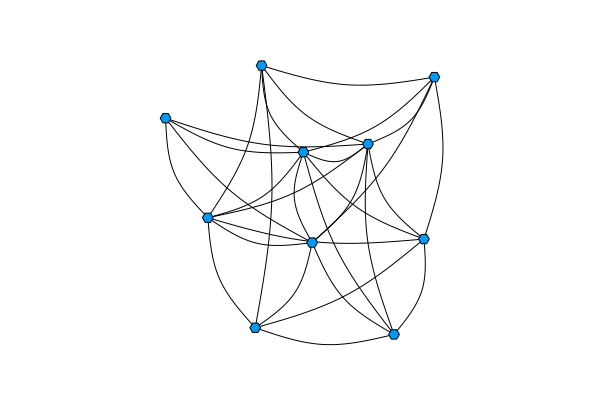

In [76]:
g = SimpleWeightedGraph(E)
s = graphplot(g)

In [58]:
function mutualKNearest(X,k)
    line,column = size(X)
    output = zeros(size(X))
    neighbour = zeros(size(X))
    for i = 1:line
        for j = 1:line
            if(i != j)
                neighbour[i,j] = euclideanDistance(X[i,:],X[j,:])
            end
        end
    end
    sorted = zeros(size(X))
    for i = 1:line
        sorted[i,:] = sort(neighbour[i,:])
    end
    sorted = sorted[:,2:k+1]
    sortedInt = zeros(Int,size(sorted))
    for i = 1 : line
        sortedInt[i,:] = [Int(findfirst(x -> x == l, neighbour[i,:])) for l in sorted[i,:]]
    end
    for i = 1:line
        for j = 1:k
            index = sortedInt[i,j]
            if(i in sortedInt[index,:])
                output[i,index] = neighbour[i,index]
            end
        end
    end
            
                
    return(output)
end
M = mutualKNearest(X,5)

10×10 Matrix{Float64}:
  0.0      0.0      0.0      0.0     …   0.0     40.3733  51.4782   0.0
  0.0      0.0      0.0     59.6992     52.2877   0.0      0.0     48.3011
  0.0      0.0      0.0     44.8888      0.0     63.4665   0.0     38.3145
  0.0     59.6992  44.8888   0.0         0.0      0.0      0.0     50.6458
 53.4135  43.7035   0.0      0.0        39.5221  58.112    0.0      0.0
 50.6754  41.4849   0.0     46.9148  …   0.0      0.0      0.0     41.1825
  0.0     52.2877   0.0      0.0         0.0      0.0     66.7907   0.0
 40.3733   0.0     63.4665   0.0         0.0      0.0      0.0     56.4801
 51.4782   0.0      0.0      0.0        66.7907   0.0      0.0      0.0
  0.0     48.3011  38.3145  50.6458      0.0     56.4801   0.0      0.0

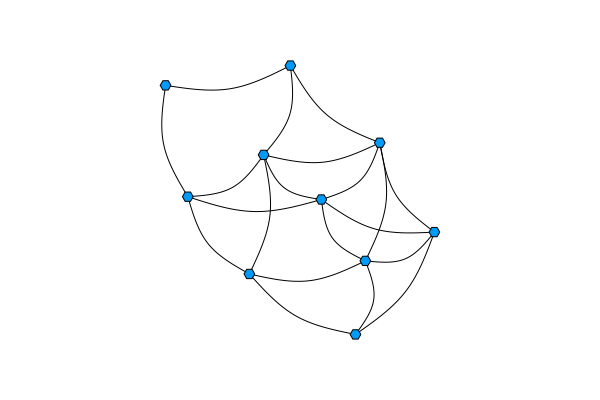

In [59]:
g = SimpleWeightedGraph(M)
graphplot(g)

In [60]:
function kNearest(X,k)
    #first we compute the neighbour distance list
    line,column = size(X)
    output = zeros(size(X))
    for i = 1:line
        neighbour = zeros(line)
        for j = 1:line
            if(i != j)
                neighbour[j] = euclideanDistance(X[i,:],X[j,:])
            end
        end
        sorted = sort(neighbour)[2:k+1]#as we delete the self-edge problem, we need to look for one more point
        found = [findfirst(x->x == l, neighbour) for l in sorted ]
        for index in found
            output[i,index] = neighbour[index]
            output[index,i] = neighbour[index]
        end
    end
    return output
end

kNearest (generic function with 1 method)

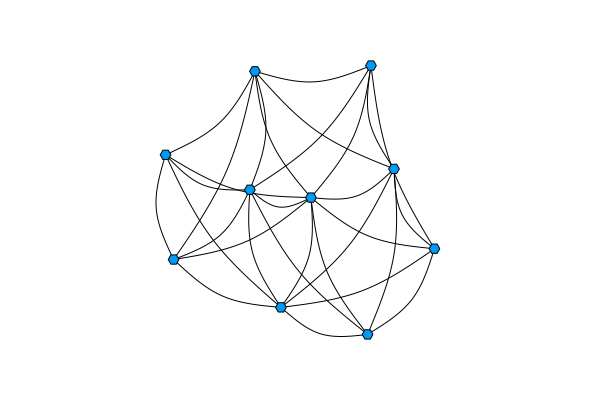

In [61]:
kn = kNearest(X,5)
g = SimpleWeightedGraph(kn)
graphplot(g)

In [62]:
function Gaussian(x1,x2,σ)
    return exp((-norm(x1-x2)^2)/(2*σ^2))
end

Gaussian (generic function with 1 method)

In [63]:
function fullyConnected(X,σ)
    line,column = size(X)
    output = zeros(size(X))
    for i = 1 : line
        for j = 1 : line
            if(i != j)
                output[i,j] = Gaussian(X[i,:],X[j,:],σ)
            end
        end
    end
    return output
end
F = fullyConnected(X,100)

10×10 Matrix{Float64}:
 0.0       0.82115   0.794375  0.794573  …  0.921733  0.875903  0.828035
 0.82115   0.0       0.802238  0.836775     0.750324  0.791085  0.889897
 0.794375  0.802238  0.0       0.904159     0.817585  0.775537  0.929229
 0.794573  0.836775  0.904159  0.0          0.77674   0.738414  0.879633
 0.867057  0.908918  0.767321  0.818731     0.844636  0.817463  0.821232
 0.879502  0.917548  0.834018  0.895789  …  0.856244  0.800595  0.918696
 0.825101  0.872232  0.703104  0.790808     0.732384  0.800075  0.71566
 0.921733  0.750324  0.817585  0.77674      0.0       0.769896  0.85257
 0.875903  0.791085  0.775537  0.738414     0.769896  0.0       0.742821
 0.828035  0.889897  0.929229  0.879633     0.85257   0.742821  0.0

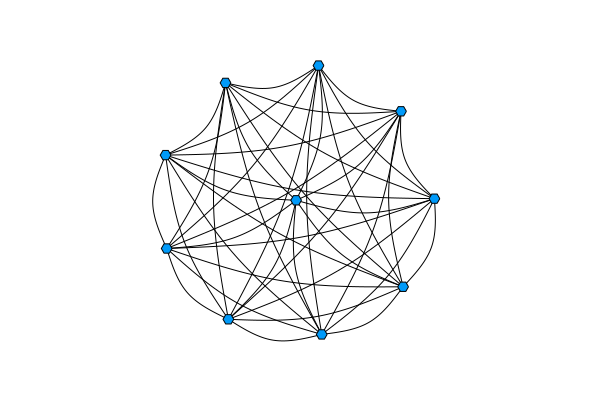

In [64]:
g = SimpleWeightedGraph(F)
graphplot(g)